# Linear Regression Model

# DataFrame Imports

This notebook contains a basic linear regression. 

You will see the data cleaning, exploratory data analysis (EDA), preporcessing, modeling, and lastly evulation to submit to the Kaggle Competition. 

*Linear Regression will be referred to as 'lr','linreg', or 'LR throughout the text

In [8]:
#First import the Libraries & tools needed to comeplete the Linear Regression

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge, Lasso, ElasticNet, LassoCV, RidgeCV
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, cross_val_predict
from sklearn.preprocessing import OneHotEncoder, StandardScaler, PolynomialFeatures
from sklearn.compose import make_column_transformer

from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.feature_selection import RFE
from sklearn.impute import SimpleImputer


In [9]:
#Import the TRAINING data
#Using .head() to see what columns exist and the values with inside

training = pd.read_csv('/Users/khalildavis/Desktop/General Assembly Work/Submissions/Projects/Project 2 Final Submits/Data Sets/train.csv')
training.head()

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice
0,109,533352170,60,RL,NaN,13517,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,3,2010,WD,130500
1,544,531379050,60,RL,43.0,11492,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,4,2009,WD,220000
2,153,535304180,20,RL,68.0,7922,Pave,NaN,Reg,Lvl,...,0,0,NaN,NaN,NaN,0,1,2010,WD,109000
3,318,916386060,60,RL,73.0,9802,Pave,NaN,Reg,Lvl,...,0,0,NaN,NaN,NaN,0,4,2010,WD,174000
4,255,906425045,50,RL,82.0,14235,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,3,2010,WD,138500


In [10]:
#The is to import the sample_sub data set.

samplesub = pd.read_csv('/Users/khalildavis/Desktop/General Assembly Work/Submissions/Projects/Project 2 Final Submits/Data Sets/sample_sub_reg_origin.csv')
samplesub.head()

,Id,SalePrice
0,2,181479.1217
1,4,181479.1217
2,6,181479.1217
3,7,181479.1217
4,17,181479.1217


In [11]:
# Import the TEST Data that is given

testing = pd.read_csv('/Users/khalildavis/Desktop/General Assembly Work/Submissions/Projects/Project 2 Final Submits/Data Sets/test.csv')
testing.head()


,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type
0,2658,902301120,190,RM,69.0,9142,Pave,Grvl,Reg,Lvl,...,0,0,0,NaN,NaN,NaN,0,4,2006,WD
1,2718,905108090,90,RL,NaN,9662,Pave,NaN,IR1,Lvl,...,0,0,0,NaN,NaN,NaN,0,8,2006,WD
2,2414,528218130,60,RL,58.0,17104,Pave,NaN,IR1,Lvl,...,0,0,0,NaN,NaN,NaN,0,9,2006,New
3,1989,902207150,30,RM,60.0,8520,Pave,NaN,Reg,Lvl,...,0,0,0,NaN,NaN,NaN,0,7,2007,WD
4,625,535105100,20,RL,NaN,9500,Pave,NaN,IR1,Lvl,...,0,185,0,NaN,NaN,NaN,0,7,2009,WD


In [12]:
#Find the mean of the 'SalePrice' column on the traning (dateframe = df)
##The baseline model for a Regression problem is taking the mean
#Taking the mean of our y and predict that across the board 
#also the number to compare out predicted values too

training['SalePrice'].mean()

181469.70160897123

In [13]:
#Add the mean saleprice column to the testing dataset column

testing['SalePrice'] = training['SalePrice'].mean()
testing.head()

#succesful column add as we can see the 'SalePrice' at the end

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice
0,2658,902301120,190,RM,69.0,9142,Pave,Grvl,Reg,Lvl,...,0,0,NaN,NaN,NaN,0,4,2006,WD,181469.701609
1,2718,905108090,90,RL,NaN,9662,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,8,2006,WD,181469.701609
2,2414,528218130,60,RL,58.0,17104,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,9,2006,New,181469.701609
3,1989,902207150,30,RM,60.0,8520,Pave,NaN,Reg,Lvl,...,0,0,NaN,NaN,NaN,0,7,2007,WD,181469.701609
4,625,535105100,20,RL,NaN,9500,Pave,NaN,IR1,Lvl,...,185,0,NaN,NaN,NaN,0,7,2009,WD,181469.701609


In [14]:
#To make a new data frame of ONLY Id & SalePrice of the testing data set 
# Can use the double brackets to isolate both columns
#This is an example of what our evaluation model will need to look like

testing[['Id', 'SalePrice']]

,Id,SalePrice
0,2658,181469.701609
1,2718,181469.701609
2,2414,181469.701609
3,1989,181469.701609
4,625,181469.701609
...,...,...
873,1662,181469.701609
874,1234,181469.701609
875,1373,181469.701609
876,1672,181469.701609


# EDA

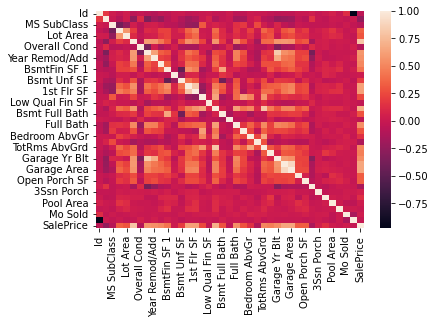

In [15]:
#See correlation model of the training set to help choose with features to try in the model

sns.heatmap(training.corr());



Using the matrix correlation above, to find the features that have correlation to one another to have a high chance of predicting sale prices with low chances of error. The lighter the color, the higher the correlation.

These are the features I would like to try first, then increase or decrease as I go along according to the data.

Lot Area, BsmtFin SF 1 , 1st Flr SF, 2nd Flr SF, Full Bath, 
Garage Area, Bedroom AbvGr, Kitchen AbvGr, Wood Deck SF, 
Open Porch SF, Pool Area


Side Note: I want to try Catergorical columns number 40-43, 16, 17, 28-29 in future models

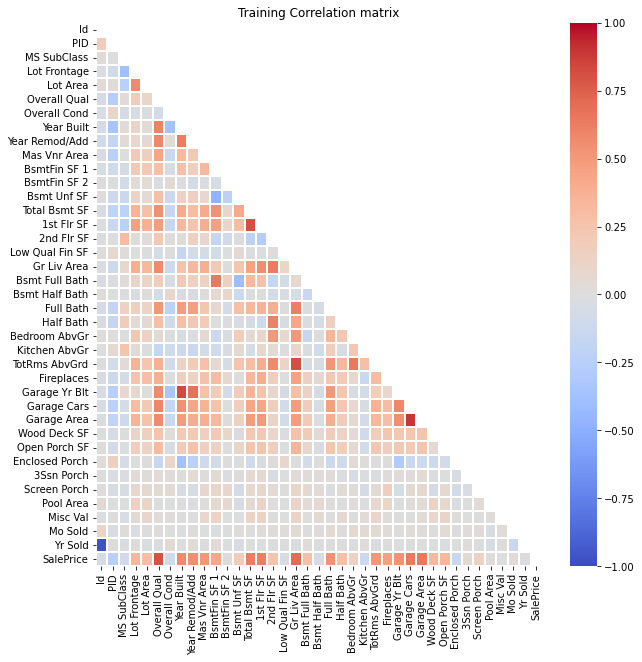

In [16]:
#Create a correlation Matrix for the features, to have a better view.

mask = np.zeros_like(training.corr())
mask[np.triu_indices_from(mask)] = True

plt.figure(figsize=(10, 10))
sns.heatmap(
    training.corr(),
    cmap='coolwarm',
    annot=False,
    mask=mask,
    vmin=-1.,
    vmax=1.,
    linewidths=.1,
    center=0
)

plt.title('Training Correlation matrix'); 



Once I have choosen the features I would like to use, I start to prepare for the Train_Test_Split by stating my X and y.

The X contains the features I am trying out. The y will always be the 'Sale Price' because that is what we are trying to predict for the city of Ames, IA.

In [17]:
#Establish our X & y for train-test-split (tts)

X = training[['Lot Area', 'BsmtFin SF 1' , '1st Flr SF', 
'2nd Flr SF', 'Full Bath', 'Garage Area', 
'Bedroom AbvGr', 'Kitchen AbvGr', 'Wood Deck SF', 
'Open Porch SF', 'Pool Area']]

y = training['SalePrice']

In [18]:
#Performed 'tts' with random state to have continous numbers through out the models

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=444)

# Data Cleaning & Preprocessing

To clean the data to use within the tts, I will be using Simple Imputer to help filling in missing data cells within the training and testing data sets. 

Since its a basic LR, I have choosen the strategy='mean' because majority of the features I am starting with a numeric. If the features were catergorical, I would have choosen strategy='most_frequent' aka the mode. 

In [19]:
#Imported SimpleImputer to fill missive values by 'mean'
#Instantiating the Simpe Imputer

si = SimpleImputer(strategy='mean')

In [20]:
#Fit & transform Simple Imputer to the training data

X_train_filled = si.fit_transform(X_train, y_train)

In [21]:
#Only transform the testing set

X_test_filled = si.transform(X_test)

In [22]:
#Create a new data frame to keep the changes that have been made with the training and testing set.

X_train_filled = pd.DataFrame(X_train_filled, columns=X_train.columns)
X_train_filled.head()

,Lot Area,BsmtFin SF 1,1st Flr SF,2nd Flr SF,Full Bath,Garage Area,Bedroom AbvGr,Kitchen AbvGr,Wood Deck SF,Open Porch SF,Pool Area
0,12929.0,697.0,1081.0,0.0,1.0,401.0,3.0,1.0,36.0,82.0,0.0
1,2544.0,368.0,600.0,600.0,2.0,480.0,2.0,1.0,0.0,172.0,0.0
2,9170.0,698.0,1214.0,0.0,1.0,461.0,2.0,1.0,0.0,0.0,0.0
3,9100.0,0.0,779.0,0.0,1.0,308.0,2.0,1.0,0.0,0.0,0.0
4,8883.0,608.0,946.0,927.0,2.0,619.0,3.0,1.0,108.0,48.0,0.0


In [23]:
#To check if there are anymore missing values within the features
#Using the method of .isna().sum()

X_train_filled.isna().sum()

Lot Area         0
BsmtFin SF 1     0
1st Flr SF       0
2nd Flr SF       0
Full Bath        0
Garage Area      0
Bedroom AbvGr    0
Kitchen AbvGr    0
Wood Deck SF     0
Open Porch SF    0
Pool Area        0
dtype: int64

In [24]:
#Treat the testing data of how I cleaned and treated the training

testing[['Lot Area', 'BsmtFin SF 1' , '1st Flr SF', '2nd Flr SF', 'Full Bath', 'Garage Area', 'Bedroom AbvGr', 'Kitchen AbvGr', 'Wood Deck SF', 
'Open Porch SF', 'Pool Area']].isna().sum()

Lot Area         0
BsmtFin SF 1     0
1st Flr SF       0
2nd Flr SF       0
Full Bath        0
Garage Area      0
Bedroom AbvGr    0
Kitchen AbvGr    0
Wood Deck SF     0
Open Porch SF    0
Pool Area        0
dtype: int64

# Modeling

In [25]:
#Instantiating the LR model

linreg = LinearRegression()

In [26]:
#Fitting the LR model on to the traning data

linreg.fit(X_train_filled, y_train)

LinearRegression()

In [27]:
#Calculation for Beta0

linreg.intercept_

36214.54245032623

In [28]:
#Calculation of Beta 1

linreg.coef_

array([ 9.77561554e-02,  2.92343878e+01,  1.03919638e+02,  7.63371844e+01,
        2.22488121e+04,  8.27698336e+01, -1.27216491e+04, -5.24984912e+04,
        2.24828613e+01,  5.01019496e+00, -1.06983612e+02])

In [29]:
#Mean of Betas
linreg.coef_.mean()

-3887.132726549535

**Evaluation:**

From the LR model, Beta0 is 36,214 in dollars while the mean of coefficients is $-3,887. This means for every one unit change in price of X, y will decrease in sale price. This is not a good model prediction because as time increases, the housing pricing will increase too.

# Evaulation & Conceptual Understanding

In [30]:
#Comparing the predictions from the tts with X_test_filled
y_pred = linreg.predict(X_test_filled)
y_pred

/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([277859.41420435,  66490.52700536, 162409.76084905, 110989.55104356,
       233801.92359119, 186879.11335026, 138102.71107099,  99130.33629666,
       191706.88098617, 100765.18719657, 160312.53343732, 223222.28279744,
       206812.14981349, 235119.34601369, 350339.11236155, 274216.89604452,
       135241.1799912 , 286979.19426627, 299794.78995973, 196093.82325263,
       170745.4972258 , 233239.32401968, 136069.95701309, 135563.57477078,
       142295.21822767, 200556.17296032, 308067.82109034, 255856.13515173,
       149556.76839354, 120560.89383743, 176513.58994775, 241815.36273706,
       237815.92859661, 119538.1857586 , 193427.24043385, 124167.17346434,
        92291.47160093, 277654.78891322, 212313.50166829,  97646.14434389,
       188826.79970611, 124541.18119406, 146291.03670152,  63597.03840177,
       196486.14147985, 243650.51786199, 135542.37881353, 130822.92902545,
       239862.87249036, 125467.88674944, 131621.03226567, 331275.91779508,
       158567.21187892,  

In [31]:
#Getting the predictions on the real testing data without the split using the given features I picked

linreg_preds =linreg.predict(testing[['Lot Area', 'BsmtFin SF 1' , '1st Flr SF', '2nd Flr SF', 'Full Bath', 'Garage Area', 'Bedroom AbvGr', 'Kitchen AbvGr', 'Wood Deck SF', 
'Open Porch SF', 'Pool Area']])
linreg_preds

array([134664.5724718 , 156568.32755205, 178060.25720051, 121678.17734113,
       174320.78641532,  98671.98263077, 120431.32969544, 130955.25382349,
       203754.51472013, 187607.86727458, 178450.38887111, 116449.52551485,
       161996.19038233, 288488.76983923, 169840.48471123, 131403.91177554,
       158390.80020444, 128617.94201419, 245115.21420569, 157306.37887199,
       116183.70882557, 139862.70784017, 220877.35300152, 170781.87065913,
       143880.22191936,  98824.76517401, 178253.3075244 , 152171.84621497,
       142924.77007444,  48516.03566188, 136430.18381197, 118427.21834858,
       269743.55369178, 164257.00545355, 197785.21967756, 159400.37404364,
       135456.94897609, 110465.6436705 , 101909.38631665, 188447.17290207,
       158348.64485043, 186438.8449163 , 169911.80143577, 173922.20304501,
       234667.53289055,  92557.75005723, 217604.95301008, 121880.34201151,
       111107.21639013, 126191.75506399, 124583.40435666, 270412.45585979,
       234233.03761081, 1

In [32]:
linreg_preds.shape

(878,)

In [33]:
y_pred.shape

(513,)

In [34]:
y_test.shape

(513,)

In [35]:
#Using the RMSE as a metric for my models
mean_squared_error(y_test, y_pred, squared=False)

47215.32342538987

**Evaluation:**
Using the root mean squared error (RMSE) to be a metric to determine the use of my model. The RMSE that is stated above, shows we are off the sale price by $47,215 which is an increase from the baseline model but still not good enough for predicting sale price. 

In [36]:
linreg.score(X_train_filled, y_train)

0.739776379285742

In [37]:
linreg.score(X_test_filled, y_test)

/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


0.6353729994103701

In [38]:
cross_val_score(linreg, X_train_filled, y_train)

array([0.78032195, 0.75065903, 0.75090916, 0.80500419, 0.53760544])

In [39]:
cross_val_score(linreg, X_test, y_test)

array([ 0.63793996,  0.61861182,  0.77719818,  0.73771998, -0.03136653])

**Evaluation**
Just checking out the score values on the training and testing set. The score values in conjuction with the cross_val_score is the R^2. Learning that the higher the R^2 score, the higher the variation within the model of testing and training sets. By comparing, the range of our R^2 models with cross validation (splitting in 5 folds) is 0.63 - 0.78.


In [40]:
#Make it equal to the testing 'SalePrice' column

testing['SalePrice'] =linreg_preds

In [41]:
#Check if columns are good for submission for Kaggle

testing[['Id', 'SalePrice']]

,Id,SalePrice
0,2658,134664.572472
1,2718,156568.327552
2,2414,178060.257201
3,1989,121678.177341
4,625,174320.786415
...,...,...
873,1662,219383.275653
874,1234,218662.151153
875,1373,128729.211654
876,1672,120177.143730


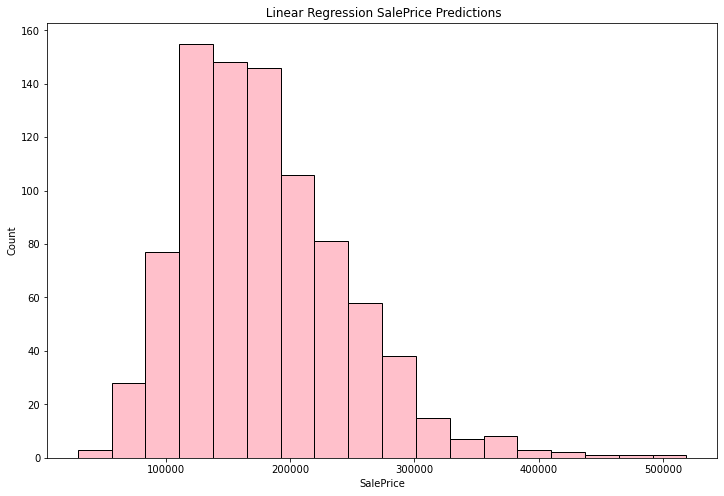

In [42]:
plt.figure(figsize = (12, 8))   

plt.hist(testing['SalePrice'], color ='pink', bins=18, ec = 'black');

plt.title(' Linear Regression SalePrice Predictions');
plt.xlabel('SalePrice')
plt.ylabel('Count');

#Showing a slight normal distribution of the Sale Price

In [43]:
#Submit to Kaggle

testing[['Id', 'SalePrice']].to_csv('Basic_LR_12F.csv', index=False)